# Big data mart sales  prediction


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

bigdatamart_Train.csv: Use this file for the model building purpose.

bigdatamart_Test.csv: Use this file for getting predictions from the trained model

In [1]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("bigdata_train.csv")
test=pd.read_csv("bigdata_test.csv")

In [3]:
#making copies of test and train datasets
train=train.copy()
test=test.copy()

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
#checking of shape if test train datasets
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [8]:
#combining the train and test dataset
data=pd.concat([train,test])
print(data.shape)

(14204, 12)


# data visualization

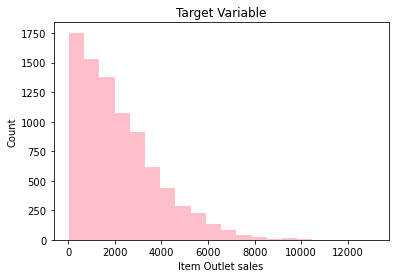

In [9]:
#univariate analysis
plt.hist(train['Item_Outlet_Sales'],bins=20,color='pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet sales')
plt.ylabel('Count')
plt.show()

In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCQ06     9
NCB18     9
DRE49     9
         ..
FDN52     1
FDC23     1
FDE52     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

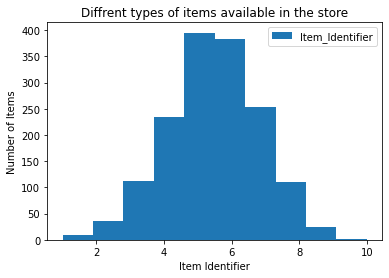

In [13]:
#now only visualization on train datasets
train['Item_Identifier'].value_counts(normalize=True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Diffrent types of items available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [14]:
#now items in item fat 
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

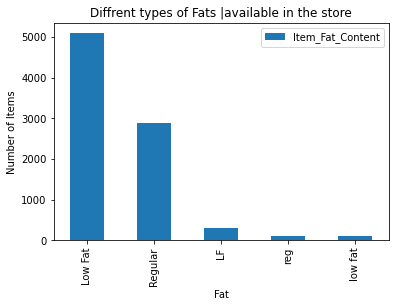

In [15]:
train['Item_Fat_Content'].value_counts(normalize=True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Diffrent types of Fats |available in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [16]:
#checking items in items type
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

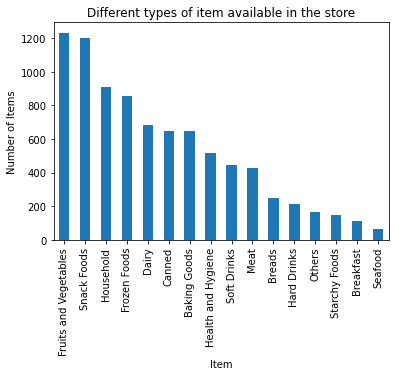

In [17]:
train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [18]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

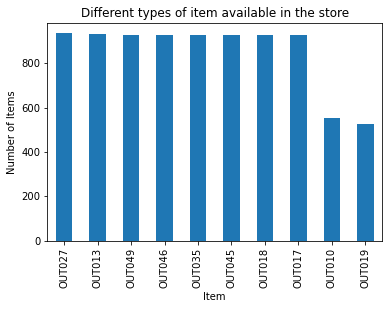

In [19]:
train['Outlet_Identifier'].value_counts(normalize=True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [20]:
train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

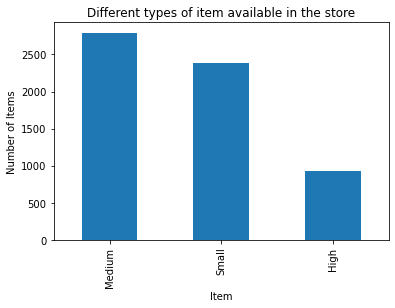

In [21]:
train['Outlet_Size'].value_counts(normalize=True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

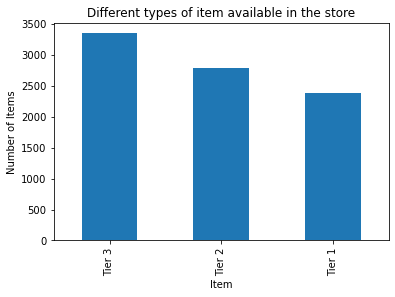

In [22]:
train['Outlet_Location_Type'].value_counts()
train['Outlet_Location_Type'].value_counts(normalize=True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

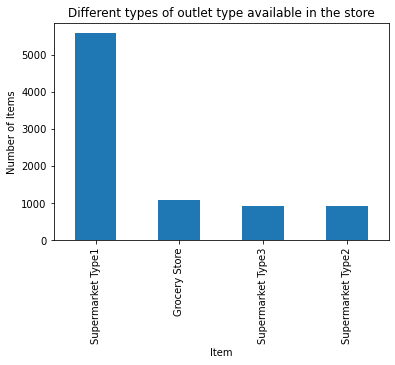

In [23]:
train['Outlet_Type'].value_counts()
train['Outlet_Type'].value_counts(normalize=True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet type available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

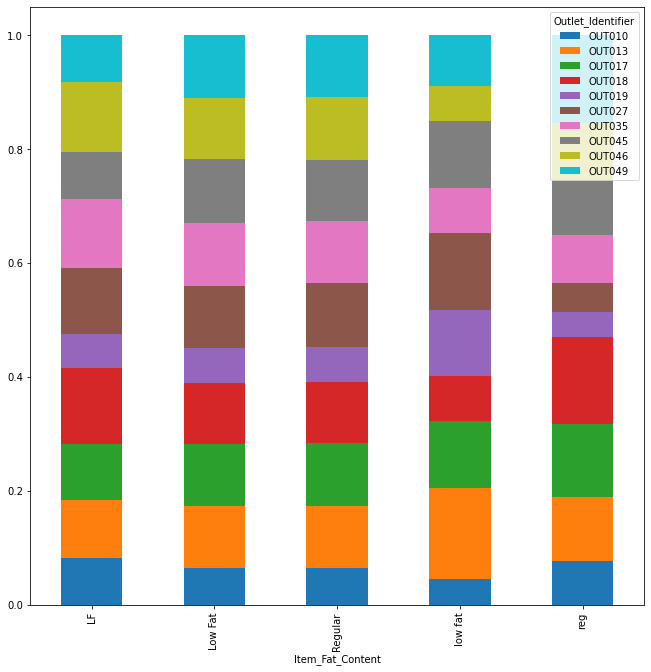

In [24]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

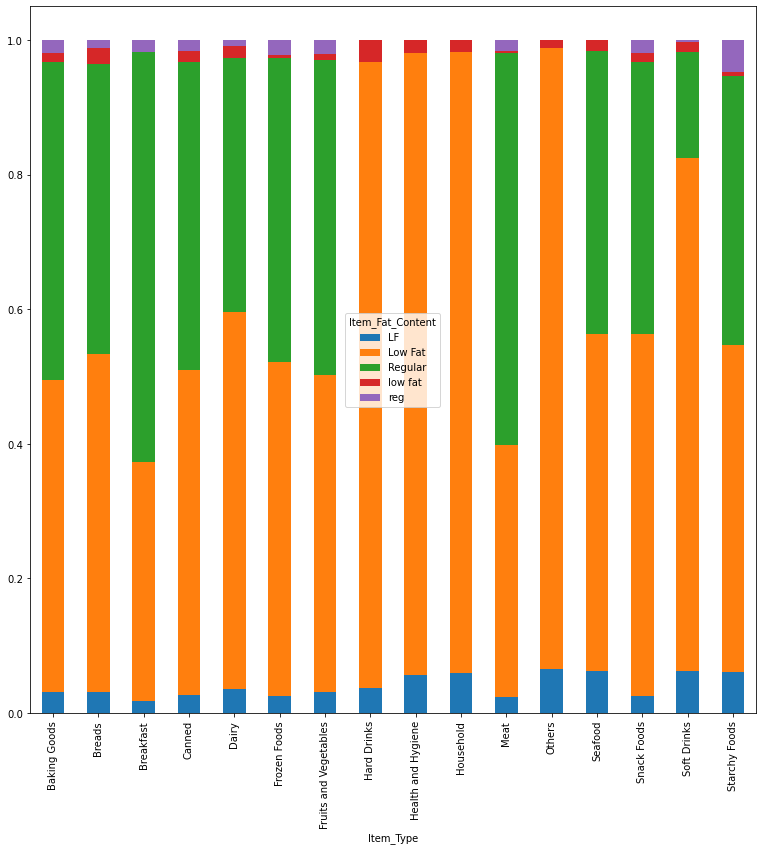

In [25]:
# fat content vs item type

Item_Fat_Content = pd.crosstab(train['Item_Type'],train['Item_Fat_Content'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(13, 13))

In [26]:
#data pre processing
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [27]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
#replacing value with NaN
data['Item_Weight']=data['Item_Weight'].replace(0,np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].replace(0,np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(),inplace=True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
#combining reg,regualr and low fat,low fat and LF
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [30]:
#get the first two characters of ID to seprate them into diffrent categories

data['Item_Identifier']=data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier']=data['Item_Identifier'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [31]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [32]:
#label encoder
from sklearn.preprocessing import LabelEncoder
data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,284,0,1097,4,7567,9,4,1,0,1,2541
1,0,57,1,1436,14,632,3,8,1,2,2,422
2,1,376,0,1172,10,3897,9,4,1,0,1,1639
3,1,393,1,0,6,5626,0,3,1,2,0,670
4,2,265,0,0,9,848,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,1692
5677,1,180,1,11820,15,5069,3,8,1,2,2,1692
5678,2,293,0,8009,8,3196,7,5,1,1,1,1692
5679,1,354,1,0,3,6626,2,7,1,1,1,1692


In [33]:
data=pd.get_dummies(data)
data.shape

(14204, 46)

In [34]:
X=data.drop('Item_Outlet_Sales',axis=1)
y=data.Item_Outlet_Sales

print(X.shape)
print(y.shape)

(14204, 45)
(14204,)


In [35]:
train=data.iloc[:8523,:]
test=data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 46)
(5681, 46)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=247)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9516, 45)
(9516,)
(4688, 45)
(4688,)


# MODELLING

# Linear Regression

In [38]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_test)
print(y_pred)

[1143.38790932 2758.33039084 2619.88215076 ... 1823.65096329 2581.64275454
 3647.72844603]


In [40]:
mse=mean_squared_error(y_test,y_pred)
print('RMSE: ',np.sqrt(mse))
print('Var Score: %.2f'% r2_score(y_test,y_pred))

RMSE:  1052.5859456201138
Var Score: 0.32


# AdaBoostRegressor

In [41]:
from sklearn.ensemble import AdaBoostRegressor

model=AdaBoostRegressor(n_estimators=100)
model.fit(X_train,y_train)


AdaBoostRegressor(n_estimators=100)

In [42]:
y_pred=model.predict(X_test)

In [43]:
mse=mean_squared_error(y_test,y_pred)
print('RMSE :',np.sqrt(mse))

RMSE : 1204.837973893754


# XG Boost Regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100)
model.fit(X_train,y_train)


GradientBoostingRegressor()

In [45]:
# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[1064.42395122 2765.86640014 2812.08780121 ... 1774.07875163 2633.95952462
 4052.70043455]
RMSE : 1043.1173052180293


# RandomForestRegressor

In [46]:
model=RandomForestRegressor(n_estimators=100,n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [47]:
# predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)


[1051.44393857 2858.36267382 3291.83915926 ... 1591.92475262 2489.29333138
 4772.45391489]


In [48]:
# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train, y_train))

RMSE : 1104.9797183757566
Variance score: 0.25
Result : 0.9007274313960343


# Decision Tree Regressor


In [49]:
model1=DecisionTreeRegressor()
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
y_pred=model1.predict(X_test)
print(y_pred)

print("RMSE :",np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 147.1418     2181.28891358 1810.976      ... 2181.28891358 2181.28891358
 2181.28891358]
RMSE : 1532.2358716201525


# Support vector machine

In [52]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

# predicting the x test results
y_pred = model.predict(X_test)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))

RMSE : 1278.0878214493403


In [53]:
import pickle

In [54]:
filename='Bigmart.pkl'
pickle.dump(model1,open(filename,'wb'))

In [55]:
fitted_model=pickle.load(open('Bigmart.pkl','rb'))

In [56]:
fitted_model

DecisionTreeRegressor()

In [57]:
t=test.dropna(axis=1)

In [58]:
t

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,2181.288914,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,2181.288914,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,2181.288914,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,2181.288914,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,12.792854,0.118599,234.2300,1985,2181.288914,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,2181.288914,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009,2181.288914,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,2181.288914,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.300000,0.000000,214.6218,2007,2181.288914,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
